In [ ]:
pip install umap

In [ ]:
# Set up environment
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.datasets import fetch_openml
import random
import tensorflow as tf
import umap

# supress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")
#set all floats to max of 3 decimals
pd.options.display.float_format = "{:,.3f}".format

#1 Load the dataset and conduct any necessary preprocessing, such as normalizing the data.

In [ ]:
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

In [ ]:
indices = np.random.choice(70000,10000)
X = mnist.data[indices] / 255.0
y = mnist.target[indices]

print(X.shape, y.shape)

(10000, 784) (10000,)


#2 Apply UMAP to the data.

In [ ]:
import umap.umap_ as umap
umap_model = umap.UMAP()
umap_model_components = pd.DataFrame(umap_model.fit_transform(X), columns=['0', '1'])
umap_model_components['target'] = y

#3 Using the two-dimensional UMAP representation, draw a graph of the data by coloring and labeling the data points as you did in the checkpoint.

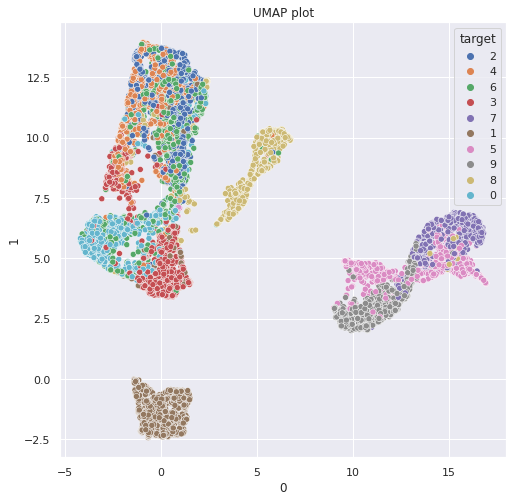

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x='0', y='1', hue='target', data=umap_model_components, ax=ax)
plt.title(f'UMAP plot')
plt.show()    

#4 Do you think that the UMAP solution is satisfactory? Can you easily distinguish between the different classes? Which algorithm produced better results, UMAP or the others (t-SNE or PCA) that you applied in the assignments from the previous checkpoints?

UMAP is much better than PCA or t-SNE. It has at least 4 distinct cluster, unlike the blob we saw with PCA. We do see even tighter and more distinct clusters than we say with t-SNE. 

#5 Now, play with the different hyperparameter values of the UMAP, and apply UMAP for each of them. Which combination is the best in terms of the two-dimensional representation clarity?

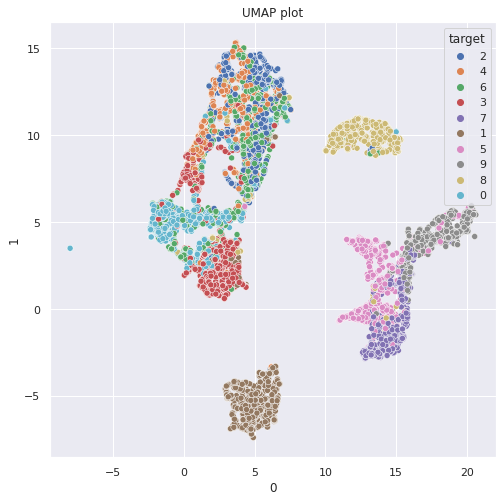

In [ ]:
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.1)
umap_model_components = pd.DataFrame(umap_model.fit_transform(X), columns=['0', '1'])
umap_model_components['target'] = y

fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x='0', y='1', hue='target', data=umap_model_components, ax=ax)
plt.title(f'UMAP plot')
plt.show()    

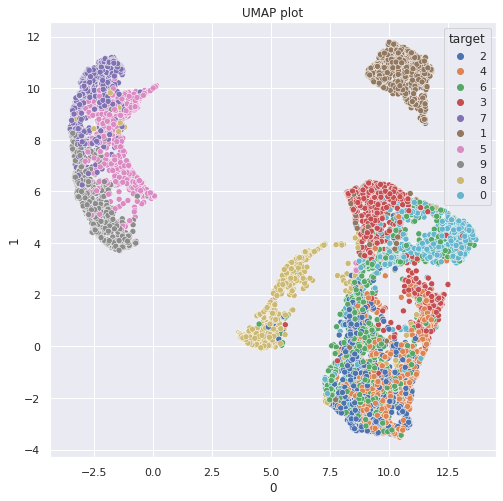

In [ ]:
umap_model = umap.UMAP(n_neighbors=20, min_dist=0.1)
umap_model_components = pd.DataFrame(umap_model.fit_transform(X), columns=['0', '1'])
umap_model_components['target'] = y

fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x='0', y='1', hue='target', data=umap_model_components, ax=ax)
plt.title(f'UMAP plot')
plt.show()    

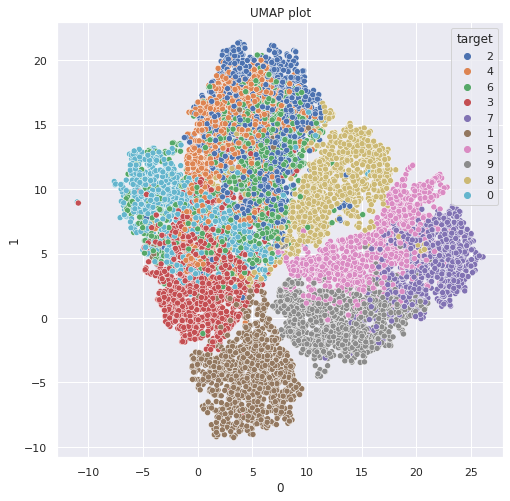

In [ ]:
umap_model = umap.UMAP(n_neighbors=5, min_dist=1)
umap_model_components = pd.DataFrame(umap_model.fit_transform(X), columns=['0', '1'])
umap_model_components['target'] = y

fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x='0', y='1', hue='target', data=umap_model_components, ax=ax)
plt.title(f'UMAP plot')
plt.show()    

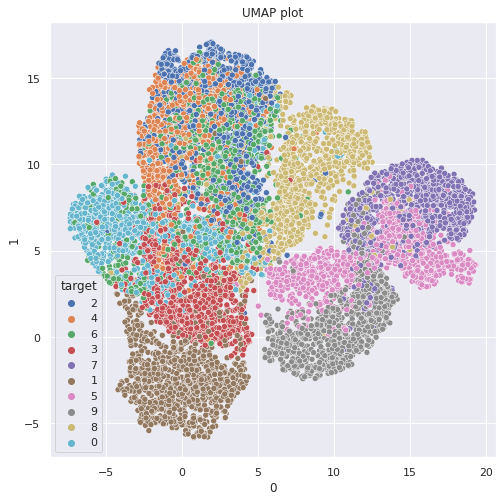

In [ ]:
umap_model = umap.UMAP(n_neighbors=20, min_dist=1)
umap_model_components = pd.DataFrame(umap_model.fit_transform(X), columns=['0', '1'])
umap_model_components['target'] = y

fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x='0', y='1', hue='target', data=umap_model_components, ax=ax)
plt.title(f'UMAP plot')
plt.show()

The model with n_neighors of 5 and min_dist of 0.1 seems to be the best. We see the tighest and most distinct clusters with those hyperparameters. 